**Import Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


sns.set(style="whitegrid")


Load Data

In [6]:
df = pd.read_csv('student_habits_performance.csv')
print(df.head())
print(df.info())

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

**Cek dan Preprocessing Data**


In [7]:
#info umum dataset
df.info()

#Cek dan hapus missing value jika ada
print("Missing values:\n", df.isnull().sum())
df = df.dropna()

# Menghapus kolom yang tidak relevan untuk prediksi, seperti 'student_id'
if 'student_id' in df.columns:
    df = df.drop(columns=['student_id'])

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=['exam_score'])
y = df['exam_score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(pd.DataFrame(X_scaled, columns=X.columns).head())

print("Fitur setelah encoding dan scaling:", X.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

**Split Data dan Train Test**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Train model Regresi Linear**

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


**Evaluasi Model**

In [10]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE   : {mse:.2f}")
print(f"RMSE  : {rmse:.2f}")
print(f"MAE   : {mae:.2f}")
print(f"R²    : {r2:.2f}")


MSE   : 30.01
RMSE  : 5.48
MAE   : 4.24
R²    : 0.89


**Prediksi VS Nilai Aktual**


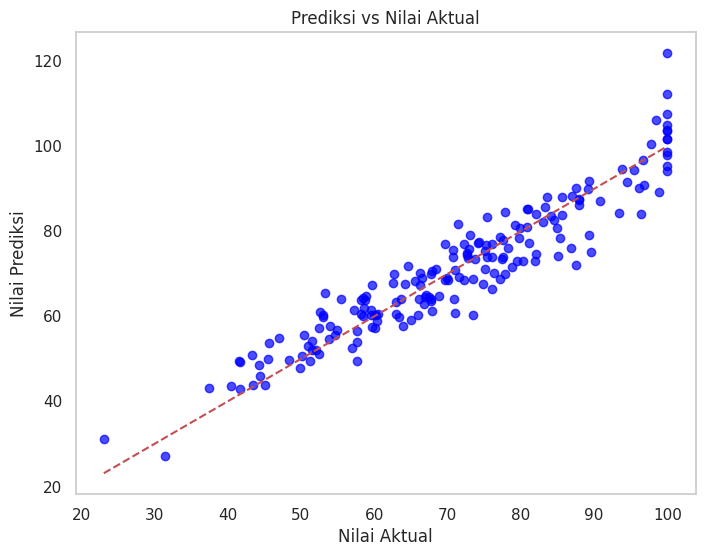

In [11]:
# Scatter plot antara nilai aktual dan prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Prediksi vs Nilai Aktual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # garis referensi
plt.grid()
plt.show()


**Koefisien Regresi**


> Tujuan dari visualisasi ini bukan untuk melihat semua fitur, tapi untuk:

    Menjelaskan fitur paling berpengaruh secara visual



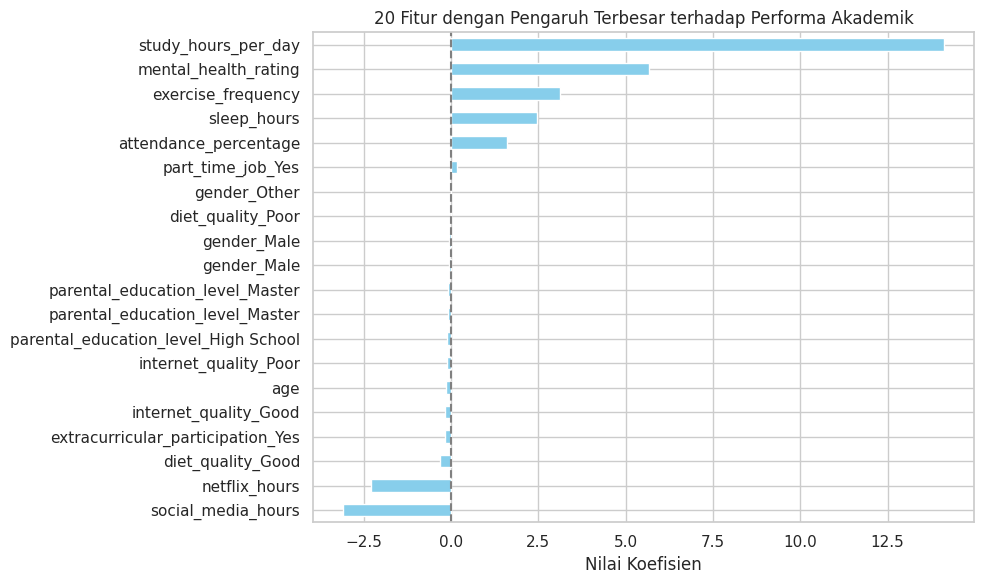

In [12]:
# Ambil 10 koefisien terbesar dan 10 terkecil
top_features = pd.Series(model.coef_, index=X.columns)
top_10 = top_features.sort_values(ascending=False).head(10)
bottom_10 = top_features.sort_values().head(10)

# Gabungkan
selected_features = pd.concat([top_10, bottom_10])

# Plot
plt.figure(figsize=(10, 6))
selected_features.sort_values().plot(kind='barh', color='skyblue')
plt.title("20 Fitur dengan Pengaruh Terbesar terhadap Performa Akademik")
plt.xlabel("Nilai Koefisien")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

In [13]:
top_features = pd.Series(model.coef_, index=X.columns)
top_10 = top_features.sort_values(ascending=False).head(10)
bottom_10 = top_features.sort_values().head(10)
print("Top 10 Fitur Positif:\n", top_10)
print("\nTop 10 Fitur Negatif:\n", bottom_10)


Top 10 Fitur Positif:
 study_hours_per_day                14.115619
mental_health_rating                5.656750
exercise_frequency                  3.114827
sleep_hours                         2.464489
attendance_percentage               1.597207
part_time_job_Yes                   0.170348
gender_Other                        0.007795
diet_quality_Poor                  -0.004085
gender_Male                        -0.056072
parental_education_level_Master    -0.077842
dtype: float64

Top 10 Fitur Negatif:
 social_media_hours                     -3.082072
netflix_hours                          -2.299755
diet_quality_Good                      -0.327663
extracurricular_participation_Yes      -0.182149
internet_quality_Good                  -0.174532
age                                    -0.146888
internet_quality_Poor                  -0.123579
parental_education_level_High School   -0.102637
parental_education_level_Master        -0.077842
gender_Male                            -0.05607

**Cross-Validaiton**

In [14]:
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print(f"Rata-rata R² (CV=5): {cv_scores.mean():.2f}")


Rata-rata R² (CV=5): 0.89
